In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [118]:
from keras.datasets import mnist
from keras.utils import to_categorical

from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Dropout, Conv2D, AveragePooling2D, MaxPooling2D, Flatten
from keras.optimizers import Adam

In [ ]:
# conda activate py36

In [55]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [56]:
width = height = X_train.shape[1]

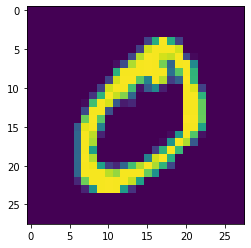

In [57]:
plt.imshow(X_train[1])

In [58]:
max_rbg_value = 255

X_train = X_train.reshape((X_train.shape[0],
                          width,
                          height,
                          1)).astype(np.float32)/max_rbg_value

X_test = X_test.reshape((X_test.shape[0],
                          width,
                          height,
                          1)).astype(np.float32)/max_rbg_value

Y_train = to_categorical(Y_train, num_classes=10)
Y_test = to_categorical(Y_test, num_classes=10)

In [59]:
# build cnn model:

model = Sequential()

model.add(Dropout(.25, input_shape=(width, height, 1), seed=1000))

model.add(Conv2D(filters=16, kernel_size=(3,3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(.5, seed=1000))

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(.5, seed=1000))

model.add(AveragePooling2D(pool_size=(2,2), padding='same'))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same'))
model.add(Activation('relu'))

model.add(AveragePooling2D(pool_size=(2,2), padding='same'))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(.5, seed=1000))

model.add(AveragePooling2D(pool_size=(2,2), padding='same'))

model.add(Flatten())

model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(.5, seed=1000))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(optimizer=Adam(lr=.001, 
                             decay=1e-5),
                             loss='categorical_crossentropy',
                             metrics=['accuracy'])

In [68]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_28 (Dropout)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
activation_29 (Activation)   (None, 28, 28, 16)        0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 28, 28, 16)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 28, 28, 32)        4640      
_________________________________________________________________
activation_30 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 28, 28, 32)       

In [63]:
# Train model:

history = model.fit(X_train, Y_train,
                   epochs=3,
                   batch_size=256,
                   validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 842s 14ms/step - loss: 0.1578 - accuracy: 0.9512 - val_loss: 0.0717 - val_accuracy: 0.9784
Epoch 2/3
60000/60000 [==============================] - 283s 5ms/step - loss: 0.1212 - accuracy: 0.9626 - val_loss: 0.0596 - val_accuracy: 0.9800
Epoch 3/3
60000/60000 [==============================] - 277s 5ms/step - loss: 0.0981 - accuracy: 0.9693 - val_loss: 0.0420 - val_accuracy: 0.9879


In [65]:
history.history

{'val_loss': [0.07169464506804943, 0.05961701166778803, 0.04197824342772365],
 'val_accuracy': [0.9783999919891357, 0.9800000190734863, 0.9879000186920166],
 'loss': [0.15775965042114257, 0.12123704603910446, 0.09813033686478932],
 'accuracy': [0.95115, 0.9625667, 0.96928334]}

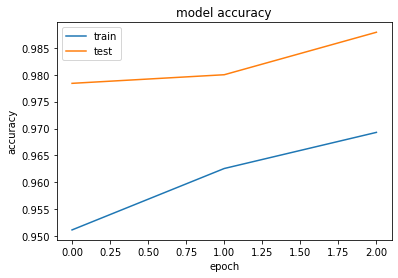

In [67]:
# Plot train history:

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()

### Visualization of feature maps

In [97]:
# summarize filters in each convolutional layer

# summarize filter shapes
for layer in model.layers:
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # get filter weights
    filters, biases = layer.get_weights()
    print(layer.name, filters.shape)

conv2d_22 (3, 3, 1, 16)
conv2d_23 (3, 3, 16, 32)
conv2d_24 (3, 3, 32, 64)
conv2d_25 (3, 3, 64, 64)


In [106]:
# retrieve weights from the second hidden layer
filters, biases = model.layers[1].get_weights()

In [107]:

# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

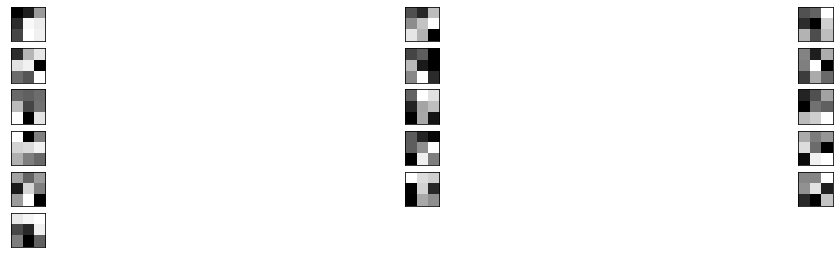

In [108]:
# plot first few filters
n_filters, ix = 16, 1
plt.figure(figsize=(20,12))
for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    # plot each channel separately
    for j in range(1):
        # specify subplot and turn of axis
        ax = plt.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(f[:, :, j], cmap='gray')
        ix += 1
# show the figure
plt.show()

In [162]:
# plot first feature map

feature_map_model = Model(inputs=model.input, output=model.layers[1].output)

feature_map_model.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_28_input (InputLayer (None, 28, 28, 1)         0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 28, 28, 16)        160       
Total params: 160
Trainable params: 160
Non-trainable params: 0
_________________________________________________________________


/Users/janrathfelder/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("dr..., outputs=Tensor("co...)`
  This is separate from the ipykernel package so we can avoid doing imports until


In [163]:
feature_maps = feature_map_model.predict(X_train[0].reshape(1,28,28,1))

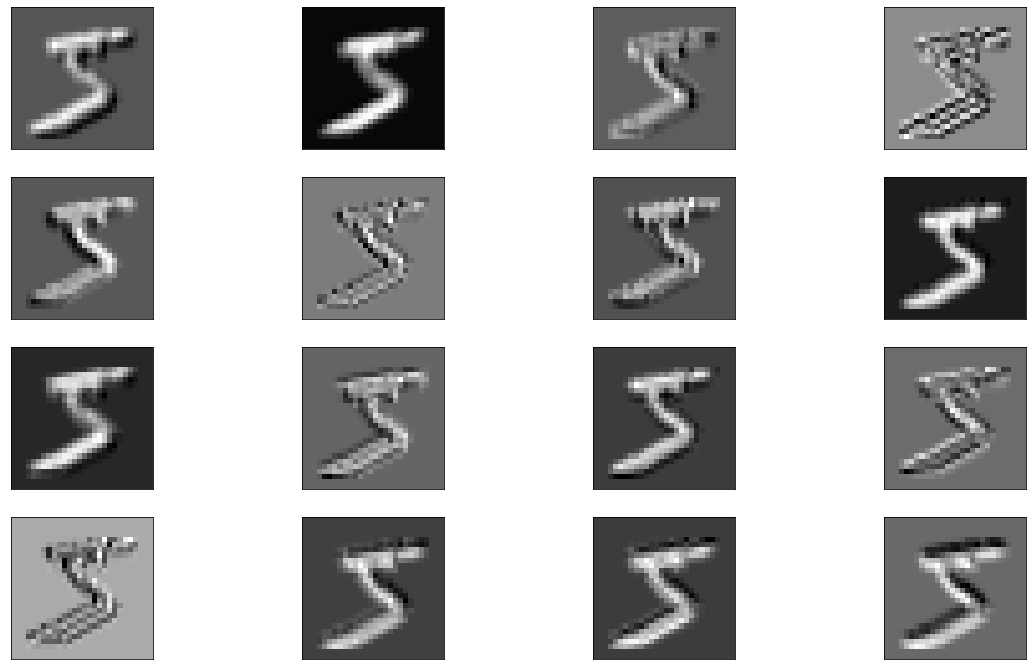

In [164]:
square = 4
ix = 1
plt.figure(figsize=(20,12))

for _ in range(square):
    for _ in range(square):
        # specify subplot and turn of axis
        ax = plt.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
        ix += 1
# show the figure
plt.show()

In [165]:
# print feature map from deeper layer

deep_layer = Model(inputs=model.input, output=model.layers[9].output)

deep_layer.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_28_input (InputLayer (None, 28, 28, 1)         0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
activation_29 (Activation)   (None, 28, 28, 16)        0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 28, 28, 16)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 28, 28, 32)        4640      
_________________________________________________________________
activation_30 (Activation)   (None, 28, 28, 32)        0   

/Users/janrathfelder/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("dr..., outputs=Tensor("ac...)`
  This is separate from the ipykernel package so we can avoid doing imports until


In [166]:
feature_maps = deep_layer.predict(X_train[0].reshape(1,28,28,1))

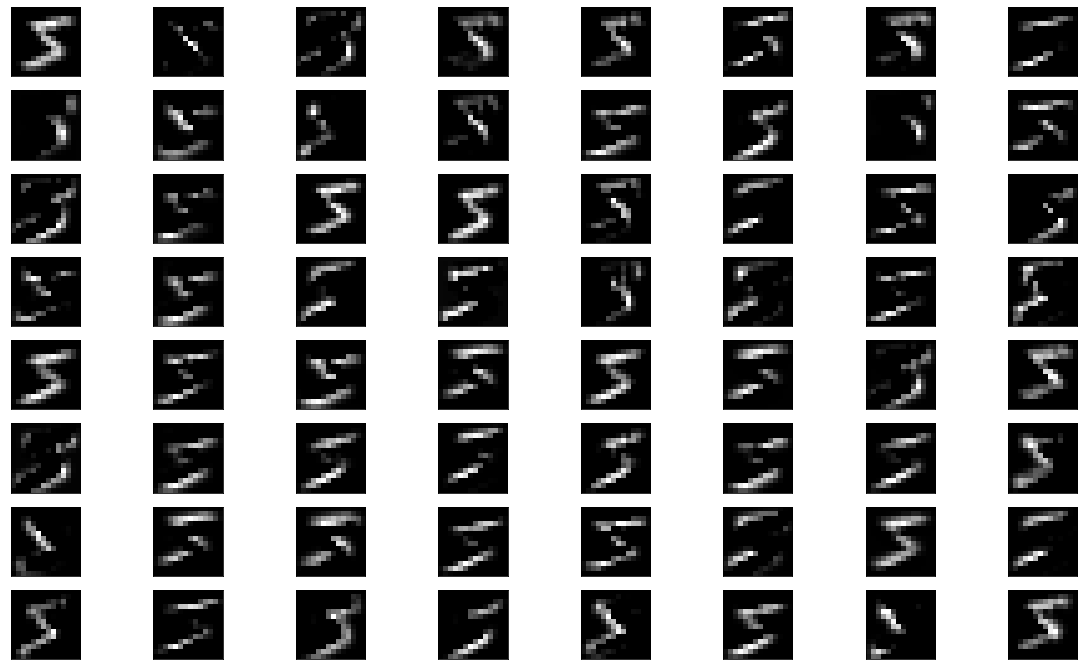

In [167]:
square = 8
ix = 1
plt.figure(figsize=(20,12))

for _ in range(square):
    for _ in range(square):
        # specify subplot and turn of axis
        ax = plt.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
        ix += 1
# show the figure
plt.show()